---
title: "data_analysis_uber"
author: "Hyeonho Jeong"
date: "2023-05-29"
categories: [code]
image: "image.png"
---

data_analysis_uber 입니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [ ]:
!pip install pydeck

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 12.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from h3 import h3
from collections import Counter
import pydeck as pdk


In [ ]:
H3_HEX_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/sf.h3cells.json"

df = pd.read_json(H3_HEX_DATA)

# Define a layer to display on a map
layer = pdk.Layer(
    "H3HexagonLayer",
    df,
    pickable=True,
    stroked=True,
    filled=True,
    extruded=False,
    get_hexagon="hex",
    get_fill_color="[255 - count, 255, count]",
    get_line_color=[255, 255, 255],
    line_width_min_pixels=2,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=37.7749295, longitude=-122.4194155, zoom=14, bearing=0, pitch=30)


# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "Count: {count}"})
r.show()

In [ ]:
# 데이터 로드
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv')

# 데이터셋 확인
print(df.head())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [ ]:
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [ ]:
type(df)

pandas.core.frame.DataFrame

- Date/Time: 여행이 시작된 날짜와 시간 정보. 예를 들어, 4/1/2014 0:11:00는 2014년 4월 1일 오전 0시 11분에 시작된 여행을 의미합니다.
- Lat: 출발지의 위도 정보. 위도는 지구의 남북 위치를 나타내는 수치입니다.
- Lon: 출발지의 경도 정보. 경도는 지구의 동서 위치를 나타내는 수치입니다.
- Base: Uber의 서비스를 제공하는 특정 "베이스 코드"가 포함되어 있습니다. 이 코드는 보통 특정 Uber 서비스 센터 또는 운영 지역을 나타냅니다.

In [ ]:
df.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


## 1. 데이터의 기본적인 indexing 및 slicing



In [ ]:
# 처음 5개의 행을 출력
print(df.head())


          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [ ]:
# 'Lat' 열의 값만 출력
print(df['Lat'])

0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
           ...   
564511    40.7640
564512    40.7629
564513    40.7443
564514    40.6756
564515    40.6880
Name: Lat, Length: 564516, dtype: float64


In [ ]:
# 10행부터 20행까지 출력
print(df.iloc[10:21])

           Date/Time      Lat      Lon    Base
10  4/1/2014 1:19:00  40.7256 -73.9869  B02512
11  4/1/2014 1:48:00  40.7591 -73.9684  B02512
12  4/1/2014 1:49:00  40.7271 -73.9803  B02512
13  4/1/2014 2:11:00  40.6463 -73.7896  B02512
14  4/1/2014 2:25:00  40.7564 -73.9167  B02512
15  4/1/2014 2:31:00  40.7666 -73.9531  B02512
16  4/1/2014 2:43:00  40.7580 -73.9761  B02512
17  4/1/2014 3:22:00  40.7238 -73.9821  B02512
18  4/1/2014 3:35:00  40.7531 -74.0039  B02512
19  4/1/2014 3:35:00  40.7389 -74.0393  B02512
20  4/1/2014 3:41:00  40.7619 -73.9715  B02512


In [ ]:
# Base 갯수 확인
df.Base.value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

## 2. 결측치에 대한 처리

In [ ]:
# 결측치 개수 확인
print(df.isnull().sum())

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


## 3. 기초적인 통계 추출 및 분석



In [ ]:
# 데이터 요약
print(df.describe())

# 'Lat' 열의 평균
print(df['Lat'].mean())

# 'Lon' 열의 중앙값
print(df['Lon'].median())

# 'Base' 열에서 각 값의 빈도수 출력
print(df['Base'].value_counts())

                 Lat            Lon
count  564516.000000  564516.000000
mean       40.740005     -73.976817
std         0.036083       0.050426
min        40.072900     -74.773300
25%        40.722500     -73.997700
50%        40.742500     -73.984800
75%        40.760700     -73.970000
max        42.116600     -72.066600
40.74000520746974
-73.9848
B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64


## 4. 데이터에 대한 질문을 던져보고 해답을 찾기



### 4.1 월별/요일별 Uber 이용량 비교
- 가장 Uber 이용량이 많은 요일은 언제일까요?

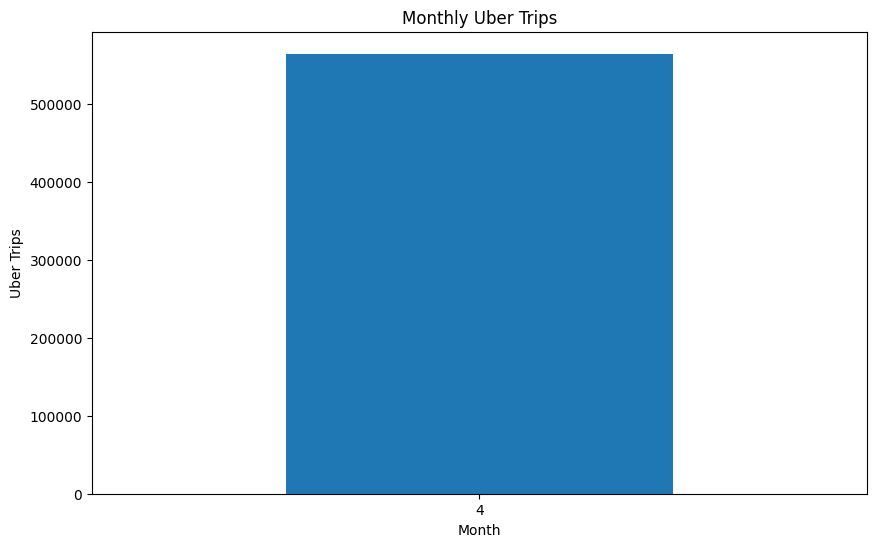

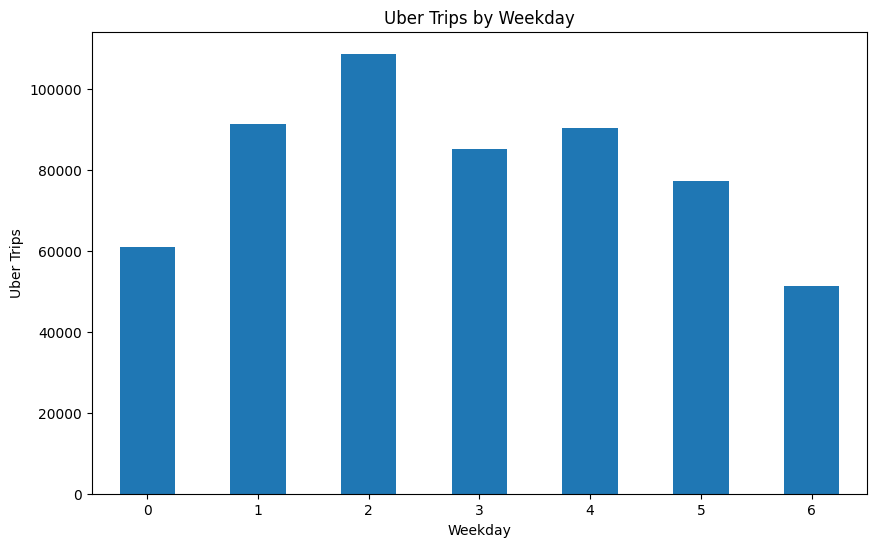

가장 Uber 이용량이 많은 요일: 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv')

# 'Date/Time' 열을 datetime 형식으로 변환
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# 월별 이용량 계산
df['Month'] = df['Date/Time'].dt.month
monthly_counts = df['Month'].value_counts().sort_index()

# 월별 이용량 시각화
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Uber Trips')
plt.title('Monthly Uber Trips')
plt.xticks(rotation=0)
plt.show()

# 요일별 이용량 계산
df['Weekday'] = df['Date/Time'].dt.weekday
weekday_counts = df['Weekday'].value_counts().sort_index()

# 요일별 이용량 시각화
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Uber Trips')
plt.title('Uber Trips by Weekday')
plt.xticks(rotation=0)
plt.show()

# 가장 많은 이용량을 기록한 요일 식별
most_popular_weekday = weekday_counts.idxmax()
print('가장 Uber 이용량이 많은 요일:', most_popular_weekday)

### 4.2 시간대별 이용량 비교

- 가장 이용량이 많은 시간대는 언제일까요? 


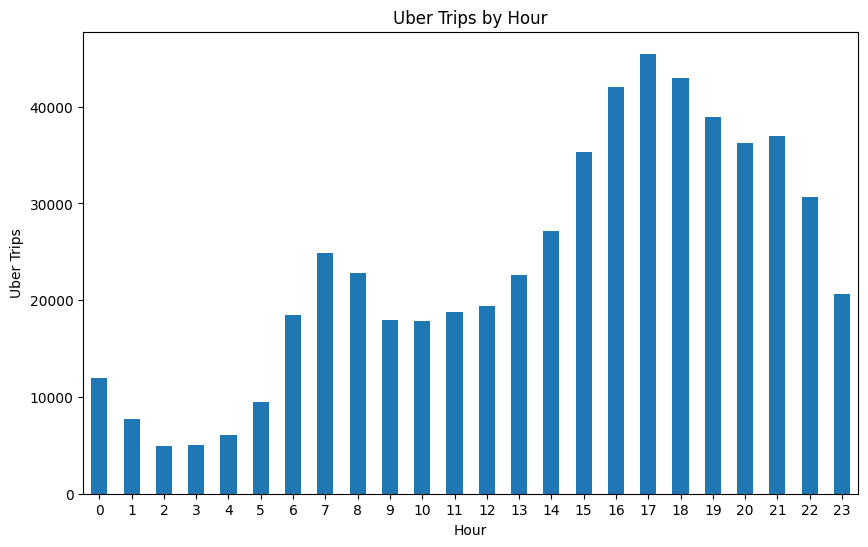

가장 Uber 이용량이 많은 시간대: 17


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv')

# 'Date/Time' 열을 datetime 형식으로 변환
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# 시간대별 이용량 계산
df['Hour'] = df['Date/Time'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

# 시간대별 이용량 시각화
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Uber Trips')
plt.title('Uber Trips by Hour')
plt.xticks(rotation=0)
plt.show()

# 가장 많은 이용량을 기록한 시간대 식별
most_popular_hour = hourly_counts.idxmax()
print('가장 Uber 이용량이 많은 시간대:', most_popular_hour)

### 4.3 Uber 수요에 대한 공간적인 시각화

- 가장 수요가 많은 지역은 어디일까요?
- 시간대/지역별로 수요의 변화를 나타내보고, 시사점을 도출해 봅시다

folium

In [ ]:
!pip install folium

출력한지도를 vs코드로 올리고 블로그올리면 터져서 출력지움

In [ ]:
import pandas as pd
from collections import Counter
import folium
from h3 import h3

# 데이터 로드
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv')

# 필요한 열 추출: 'Date/Time', 'Lat', 'Lon'
df = df[['Date/Time', 'Lat', 'Lon']]

# H3 그리드 셀 크기 설정
h3_resolution = 9

# 시간대/지역별 수요 계산
df['H3_Cell'] = df.apply(lambda row: h3.geo_to_h3(row['Lat'], row['Lon'], h3_resolution), axis=1)
demand_counts = Counter(df['H3_Cell'])

# 수요가 가장 많은 지역 식별
most_popular_cell = demand_counts.most_common(1)[0][0]

# 지도 생성
m = folium.Map(location=[df['Lat'].mean(), df['Lon'].mean()], zoom_start=10)

# 시간대/지역별 수요를 지도에 표시
for h3_cell, count in demand_counts.items():
    lat, lon = h3.h3_to_geo(h3_cell)
    folium.CircleMarker(
        location=[lat, lon],
        radius=count/500,  # 원의 크기 조정
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# 수요가 가장 많은 지역을 파란색으로 표시
lat, lon = h3.h3_to_geo(most_popular_cell)
folium.CircleMarker(
    location=[lat, lon],
    radius=5,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

# 지도 출력
m


pydeck #런타임터짐


In [ ]:
import pandas as pd
from collections import Counter
import pydeck as pdk
from h3 import h3

# 데이터 로드
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv')

# 필요한 열 추출: 'Date/Time', 'Lat', 'Lon'
df = df[['Date/Time', 'Lat', 'Lon']]

# H3 그리드 셀 크기 설정
h3_resolution = 9

# 시간대/지역별 수요 계산
df['H3_Cell'] = df.apply(lambda row: h3.geo_to_h3(row['Lat'], row['Lon'], h3_resolution), axis=1)
demand_counts = Counter(df['H3_Cell'])

# 수요가 가장 많은 지역 식별
most_popular_cell = demand_counts.most_common(1)[0][0]

# pydeck을 사용한 공간적 시각화
layer = pdk.Layer(
    'H3HexagonLayer',
    data=df,
    get_hexagon='H3_Cell',
    get_fill_color='[255, 0, 0, 255]',  # 색상 설정 (빨간색)
    auto_highlight=True,
    elevation_scale=100,
    pickable=True
)

view_state = pdk.ViewState(
    latitude=df['Lat'].mean(),
    longitude=df['Lon'].mean(),
    zoom=10
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()


<IPython.core.display.Javascript object>